    L20-0910 TAIMOOR MUKHTAR
    L20-1050 HAMZA SHAHID
    L20-1081 SOHAIB AMIR
    L20-2193 ARHAM ASJID

#                                                  PLANTS CLASSIFIER

### Data loading

In [1]:
##Updated to Keras 2.0
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model

In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'plants_data/train'
validation_data_dir = 'plants_data/test'

### Imports

In [3]:
##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 663 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


### Model architecture definition

In [4]:


#////  hybrid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
learning_rate = 0.001
batch_size = 32
num_epochs = 50

optimizer = Adam(learning_rate=learning_rate)

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('sigmoid'))



In [5]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



### Training

In [6]:
from keras.callbacks import ModelCheckpoint

train_samples = 663
validation_samples =214 

#create callback
filepath = 'my_best_model.keras'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]


In [7]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        rotation_range=40,     # randomly rotate images by up to 40 degrees
        width_shift_range=0.2, # randomly shift images horizontally by up to 20%
        height_shift_range=0.2,# randomly shift images vertically by up to 20%
        shear_range=0.2,       # randomly apply shearing transformation
        zoom_range=0.2,        # randomly apply zooming transformation
        horizontal_flip=True,  # randomly flip the images horizontally
        fill_mode='nearest')   # fill any gaps created by the transformations with the nearest pixel value

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        rotation_range=40,     # randomly rotate images by up to 40 degrees
        width_shift_range=0.2, # randomly shift images horizontally by up to 20%
        height_shift_range=0.2,# randomly shift images vertically by up to 20%
        shear_range=0.2,       # randomly apply shearing transformation
        zoom_range=0.2,        # randomly apply zooming transformation
        horizontal_flip=True,  # randomly flip the images horizontally
        fill_mode='nearest')   # fill any gaps created by the transformations with the nearest pixel value

# same code as before
validation_generator_augmented = validation_datagen_augmented.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 663 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator_augmented,steps_per_epoch=train_samples // batch_size, epochs=num_epochs, batch_size=batch_size, validation_data=validation_generator_augmented,validation_steps=validation_samples // batch_size,callbacks=callbacks)

# save history to file
import pickle
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.7149 - accuracy: 0.5658
Epoch 1: val_loss improved from inf to 0.64797, saving model to my_best_model.keras
20/20 [==============================] - 17s 710ms/step - loss: 0.7149 - accuracy: 0.5658 - val_loss: 0.6480 - val_accuracy: 0.7292
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.6054
Epoch 2: val_loss improved from 0.64797 to 0.56383, saving model to my_best_model.keras
20/20 [==============================] - 10s 480ms/step - loss: 0.6567 - accuracy: 0.6054 - val_loss: 0.5638 - val_accuracy: 0.7292
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.6061 - accuracy: 0.5990
Epoch 3: val_loss did not improve from 0.56383
20/20 [==============================] - 10s 477ms/step - loss: 0.6061 - accuracy: 0.5990 - val_loss: 0.5898 - val_accuracy: 0.7135
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.6529
Epoch 4: 

20/20 [==============================] - 10s 504ms/step - loss: 0.4049 - accuracy: 0.8177 - val_loss: 0.3731 - val_accuracy: 0.8698
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.4095 - accuracy: 0.8257
Epoch 30: val_loss improved from 0.37308 to 0.30588, saving model to my_best_model.keras
20/20 [==============================] - 10s 494ms/step - loss: 0.4095 - accuracy: 0.8257 - val_loss: 0.3059 - val_accuracy: 0.9062
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8288
Epoch 31: val_loss did not improve from 0.30588
20/20 [==============================] - 10s 524ms/step - loss: 0.3976 - accuracy: 0.8288 - val_loss: 0.3666 - val_accuracy: 0.8385
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.4230 - accuracy: 0.7956
Epoch 32: val_loss did not improve from 0.30588
20/20 [==============================] - 10s 523ms/step - loss: 0.4230 - accuracy: 0.7956 - val_loss: 0.3219 - val_accuracy: 0.8542
Ep

In [24]:
model.save_weights('augmented_trees_shrubs.h5')

In [25]:
#model.load_weights('augmented_trees_shrubs.h5')

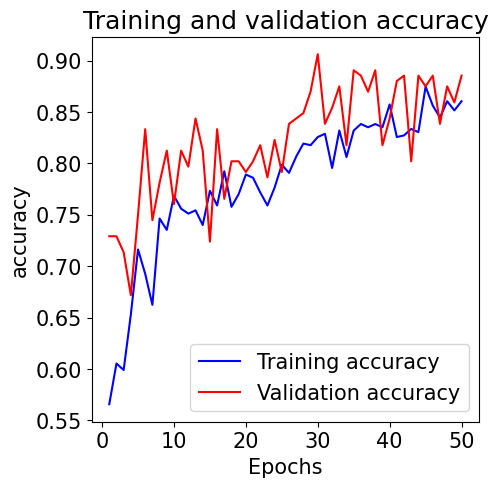

In [26]:
import matplotlib.pyplot as plt
acc = history['accuracy']
val_acc = history['val_accuracy']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , 'b' , label = 'Training accuracy' )
plt.plot(epochs , val_acc, 'r' , label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[5,5])
plt.show()

1/1 [==============================] - 0s 23ms/step

 [This image is 100.00% SHRUB and 0.00% TREE]
 


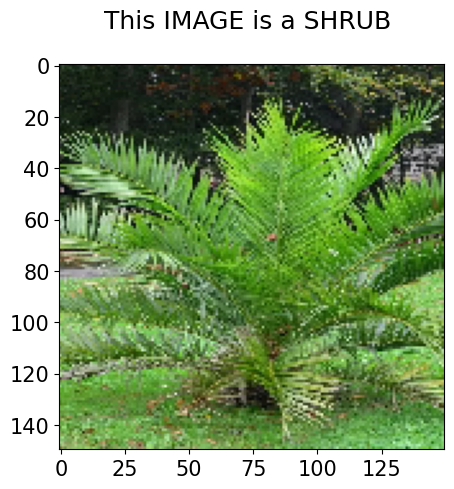

In [29]:
from tensorflow import keras
import tensorflow as tf

#shrub.png
#tree.jpeg

image_size = (150, 150)
img = keras.preprocessing.image.load_img(
    "shrub.png", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])


import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

if (100 * (1 - score))>(100 * score):
    plt.title("This IMAGE is a SHRUB \n ") 
else:
    plt.title("This IMAGE is a TREE \n ") 


plt.imshow(img)

print("\n",f"[This image is {100 * (1 - score):.2f}% SHRUB and {100 * score:.2f}% TREE]\n ")
         

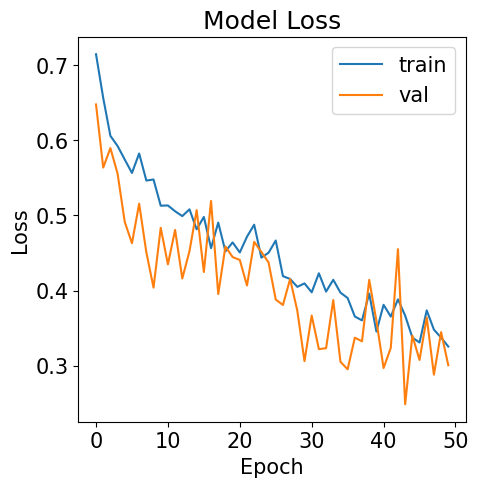

In [28]:
import matplotlib.pyplot as plt

# load history object from file
import pickle
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)

# plot training and validation loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


# A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error.